In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import clone

**Exercise 7**

In [2]:
X, y = make_moons(n_samples=10000, noise=0.4)

In [3]:
X.shape

(10000, 2)

In [4]:
X[0]

array([-0.25044937,  1.08585135])

In [5]:
y.shape

(10000,)

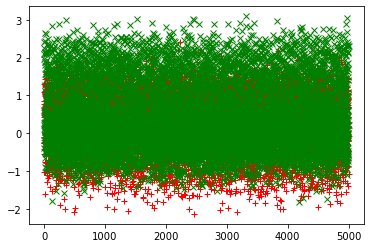

In [6]:
plt.plot(X[y==0], 'r+')
plt.plot(X[y==1], 'gx')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

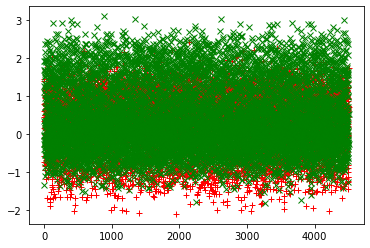

In [8]:
plt.plot(X_train[y_train==0], 'r+')
plt.plot(X_train[y_train==1], 'gx')

In [9]:
param_grid = [
    {'max_depth': np.linspace(1, 32, 32, endpoint=True)},
    {'min_samples_split': np.linspace(0.1, 1, 10)},
    {'min_samples_leaf': np.linspace(0.1, 0.5, 5)},
    {'max_leaf_nodes': list(range(2,100))}
]

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 145 candidates, totalling 725 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 725 out of 725 | elapsed:    6.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='de...
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30.,

In [10]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2.0, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
grid_search.best_score_

0.8565555555555555

In [35]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_pred, y_test)

0.851

In [36]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,

**Exercise 8**

In [13]:
n_trees = 1000
n_instances = 100

subsets=[]

# Randomly split up the training set
rs = ShuffleSplit(n_splits=n_trees, test_size = len(X_train)-n_instances)

for train_subset_index, test_subset_index in rs.split(X_train):
    X_mini_train =  X_train[train_subset_index]
    y_mini_train = y_train[train_subset_index]
    subsets.append((X_mini_train, y_mini_train))
    

In [14]:
# Create a bunch of forest predictors based on our best estimator
forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

# Fit each tree to its training subset and test accuracy
for tree, (X_mini_train, y_mini_train) in zip(forest, subsets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

In [15]:
np.mean(accuracy_scores)

0.8245450000000001

In [16]:
"""
TODO Finish it up with majority rule!
"""

'\nTODO Finish it up with majority rule!\n'

In [44]:
from scipy.stats import mode

# Empty array for our predictions
y_pred = []

for row in X_test:
    predictions = []
    
    # Get a prediction for our sample (row) from each tree
    for tree in forest:
        predictions.append(tree.predict(row.reshape(1,-1)))
    
    # Find the 'best' predictors useing SciPy's mode
    y_pred.append(mode(predictions)[0][0][0])

In [45]:
y_pred

[1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,


In [47]:
accuracy_score(y_pred, y_test)

0.853